In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris, load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

**Overview of the Code Block:**

- **Purpose:**
  - Import essential libraries for building, visualizing, and evaluating decision tree classifiers using scikit-learn.

- **Step-by-Step Actions:**
  - Import `DecisionTreeClassifier` and `plot_tree` for model creation and visualization.
  - Import datasets (`load_iris`, `load_breast_cancer`, `make_classification`) for experimentation.
  - Import `train_test_split` for dividing data into training and testing sets.
  - Import `matplotlib.pyplot` for plotting and visualization.
  - Import `classification_report` for generating detailed model performance metrics.

- **Significance:**
  - These imports provide all necessary tools for constructing, visualizing, and evaluating decision tree models on various datasets. This foundational setup enables subsequent steps in the notebook, such as data loading, model training, and performance analysis.

In [3]:
import pandas as pd

iris = load_iris()

data = load_breast_cancer()

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Data Loading and Preparation**

- **Purpose:**
  - Load the Iris and Breast Cancer datasets from scikit-learn for use in decision tree classification tasks.
  - Prepare the Breast Cancer dataset as a pandas DataFrame for easier data manipulation and exploration.

- **Step-by-Step Actions:**
  - Import the pandas library for data handling.
  - Load the Iris dataset (not used immediately, but available for future use).
  - Load the Breast Cancer dataset and store it in a variable.
  - Convert the Breast Cancer dataset into a DataFrame, assigning feature names as columns.
  - Add the target variable to the DataFrame for supervised learning tasks.
  - Display the first few rows of the DataFrame to inspect the data structure.

- **Significance:**
  - This setup provides a structured and accessible format for the Breast Cancer dataset, facilitating subsequent data analysis, visualization, and model training steps.

In [4]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Data Splitting and Initial Model Setup

- **Purpose:**
  - Prepare the Breast Cancer dataset for decision tree modeling by splitting it into training and testing sets.
  - Initialize a decision tree classifier and compute the cost-complexity pruning path.

- **Step-by-Step:**
  - Split the features and target into training and test sets using `train_test_split`.
  - Instantiate a `DecisionTreeClassifier` with a fixed random state for reproducibility.
  - Calculate the cost-complexity pruning path to obtain effective alpha values and corresponding impurities for pruning.

- **Expected Output:**
  - Variables containing the split data, the classifier, and arrays of alpha values and impurities. These are foundational for subsequent model training and pruning analysis.

In [5]:
clf = DecisionTreeClassifier()



clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Model Instantiation and Training

- **Purpose:**
  - Create and train a decision tree classifier on the training data.

- **Step-by-Step:**
  - Instantiate a new `DecisionTreeClassifier`.
  - Fit the classifier to the training data using the `fit` method.

- **Expected Output:**
  - A trained decision tree model ready for evaluation and visualization.

In [6]:
clf.get_depth()

8

### Retrieve Model Depth

- **Purpose:**
  - Obtain the depth of the trained decision tree.

- **Step-by-Step:**
  - Use the `get_depth()` method to determine the maximum depth of the fitted tree.

- **Expected Output:**
  - An integer representing the tree's depth, which reflects its complexity and potential for overfitting.

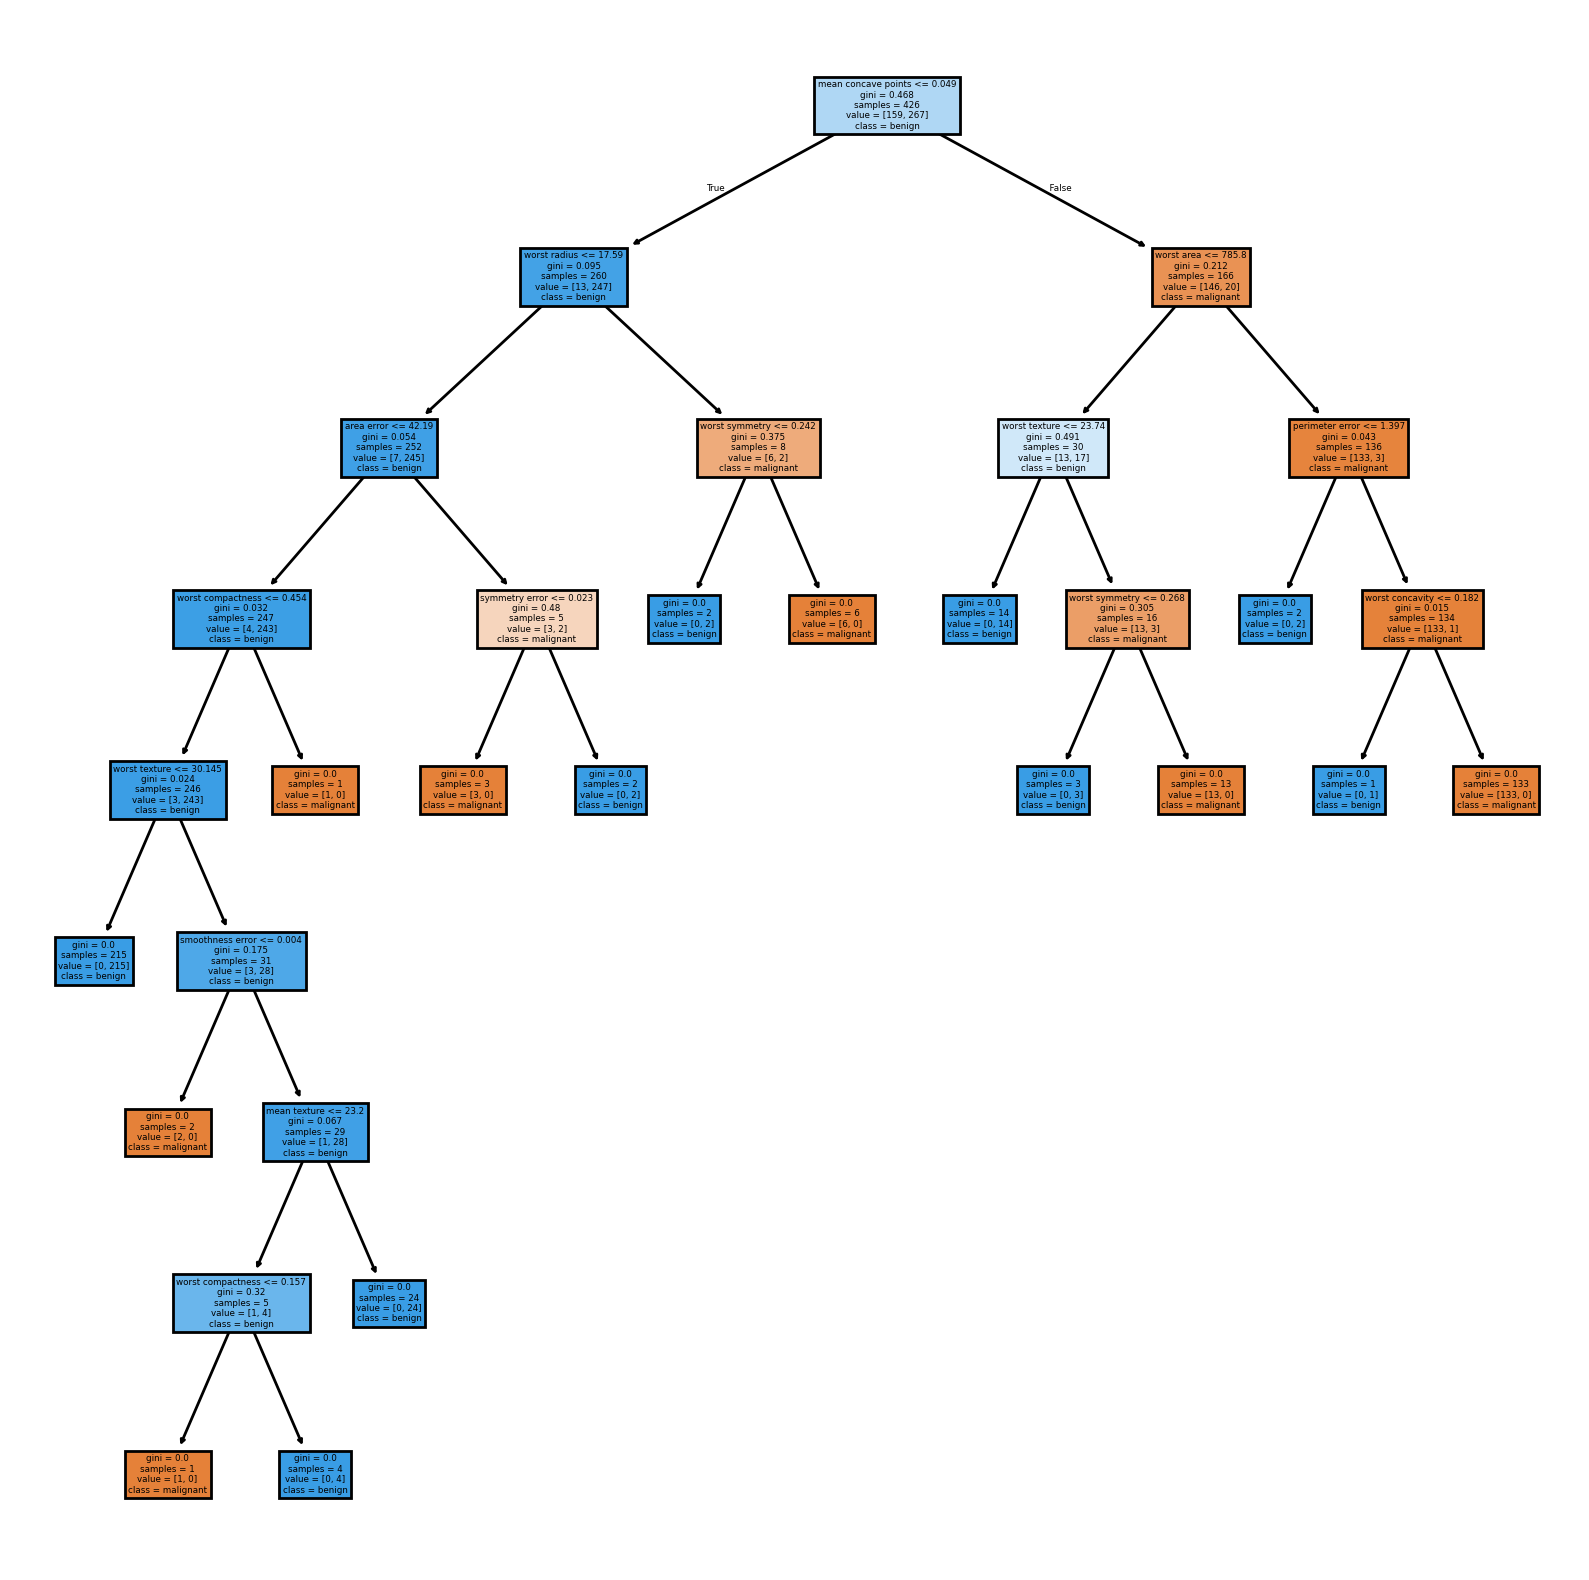

In [7]:
# Decision tree visualization
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=200)
axes.plot(linewidth =0)
_ = plot_tree(clf,
               feature_names = df.columns[:-1],
               class_names=data.target_names,
               filled = True,)

### Visualize the Decision Tree

- **Purpose:**
  - Generate a graphical representation of the trained decision tree for interpretability.

- **Step-by-Step:**
  - Create a matplotlib figure for plotting.
  - Use `plot_tree` to visualize the tree structure, including feature and class names, and color nodes by class.

- **Expected Output:**
  - A visual plot of the decision tree, aiding in understanding the model's decision rules and complexity.

In [8]:
print(classification_report(y_test, clf.predict(X_test))), print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        53
           1       0.96      0.82      0.89        90

    accuracy                           0.87       143
   macro avg       0.86      0.88      0.86       143
weighted avg       0.89      0.87      0.87       143

0.8671328671328671


(None, None)

### Model Evaluation and Performance Reporting

- **Purpose:**
  - Assess the predictive performance of the trained decision tree on the test set.

- **Step-by-Step:**
  - Generate a classification report, including precision, recall, and F1-score for each class.
  - Print the overall accuracy score of the model on the test data.

- **Expected Output:**
  - A detailed classification report and accuracy score, providing insights into the model's strengths and weaknesses.

Now applying applying regularisation technique to see if we can imporove the tree performance

In [9]:
new_clf = DecisionTreeClassifier(random_state=42)


path = new_clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas, impurities

(array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352]))

### Regularization and Cost-Complexity Pruning Path

- **Purpose:**
  - Investigate the effect of regularization on decision tree complexity and performance using cost-complexity pruning.

- **Step-by-Step:**
  - Instantiate a new decision tree classifier with a fixed random state.
  - Compute the cost-complexity pruning path to obtain a range of alpha values and corresponding impurities.
  - Output the alpha values and impurities for further analysis.

- **Expected Output:**
  - Arrays of `ccp_alphas` and `impurities`, which will be used to analyze and visualize the impact of pruning on the tree.

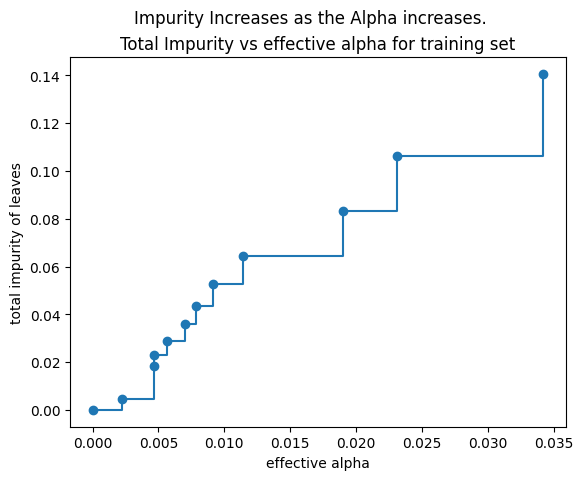

In [10]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
fig.suptitle("Impurity Increases as the Alpha increases.")

plt.show()

### Visualizing Impurity vs. Effective Alpha

- **Purpose:**
  - Illustrate how the total impurity of the tree's leaves changes as the regularization parameter (alpha) increases.

- **Step-by-Step:**
  - Plot the relationship between effective alpha values and total impurity using a step plot.
  - Label axes and provide a descriptive title for clarity.

- **Expected Output:**
  - A plot showing that as alpha increases, the total impurity of the leaves also increases, highlighting the trade-off between model complexity and generalization.

Here, as we move upward in the tree alpha increases and so the impurity

In [11]:
tree_clfs = []


for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    print('Node_Count',clf.tree_.node_count, 'cc_alpha: ', ccp_alpha)
    tree_clfs.append(clf)

Node_Count 31 cc_alpha:  0.0
Node_Count 27 cc_alpha:  0.0022664723976040134
Node_Count 21 cc_alpha:  0.004647426339100881
Node_Count 19 cc_alpha:  0.004659799593581376
Node_Count 17 cc_alpha:  0.005633802816901408
Node_Count 15 cc_alpha:  0.007042253521126761
Node_Count 13 cc_alpha:  0.007841938420144537
Node_Count 11 cc_alpha:  0.009114019793328328
Node_Count 9 cc_alpha:  0.011443661971830986
Node_Count 7 cc_alpha:  0.018988002086593604
Node_Count 5 cc_alpha:  0.023141627543035996
Node_Count 3 cc_alpha:  0.03422474765119576
Node_Count 1 cc_alpha:  0.3272984419327777


### Training Multiple Pruned Trees

- **Purpose:**
  - Train a series of decision tree classifiers, each with a different value of the regularization parameter (ccp_alpha), to analyze the effect of pruning.

- **Step-by-Step:**
  - Iterate over all computed alpha values.
  - For each alpha, instantiate and train a decision tree classifier with that alpha.
  - Print the node count and alpha value for each tree.
  - Store all trained classifiers for further analysis.

- **Expected Output:**
  - A list of trained decision trees with varying complexity, enabling comparison of model size and performance as a function of alpha.

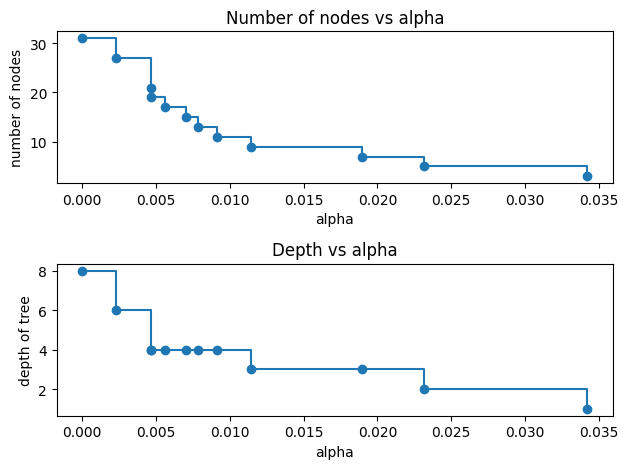

In [12]:
clfs = tree_clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Analyzing Tree Complexity: Node Count and Depth

- **Purpose:**
  - Visualize how the number of nodes and the depth of the decision tree change as the regularization parameter (alpha) increases.

- **Step-by-Step:**
  - Exclude the last classifier (fully pruned tree) for meaningful analysis.
  - Compute the node count and depth for each pruned tree.
  - Plot node count and depth against alpha values in two subplots.

- **Expected Output:**
  - Plots showing the reduction in tree size and depth as alpha increases, illustrating the impact of pruning on model complexity.

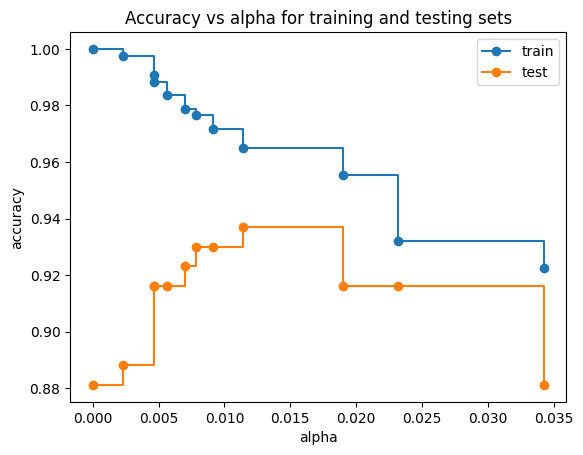

In [13]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Accuracy Analysis for Pruned Trees

- **Purpose:**
  - Evaluate and visualize the effect of pruning (alpha) on model accuracy for both training and testing sets.

- **Step-by-Step:**
  - Calculate accuracy scores for each pruned tree on both training and test data.
  - Plot accuracy versus alpha for both sets, using step plots for clarity.
  - Add labels and a legend for interpretability.

- **Expected Output:**
  - A plot showing how training and testing accuracy change with increasing alpha, helping to identify the optimal trade-off between overfitting and generalization.

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy

In [14]:
final_clf = DecisionTreeClassifier(random_state=11, ccp_alpha=0.015)


final_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, random_state=11)

### Final Model Selection and Training

- **Purpose:**
  - Train a final decision tree classifier using the optimal alpha value identified from previous analysis.

- **Step-by-Step:**
  - Instantiate a new `DecisionTreeClassifier` with the chosen `ccp_alpha` value (e.g., 0.015) and a fixed random state.
  - Fit the classifier to the training data.

- **Expected Output:**
  - A pruned decision tree model that balances complexity and generalization, ready for final evaluation and visualization.

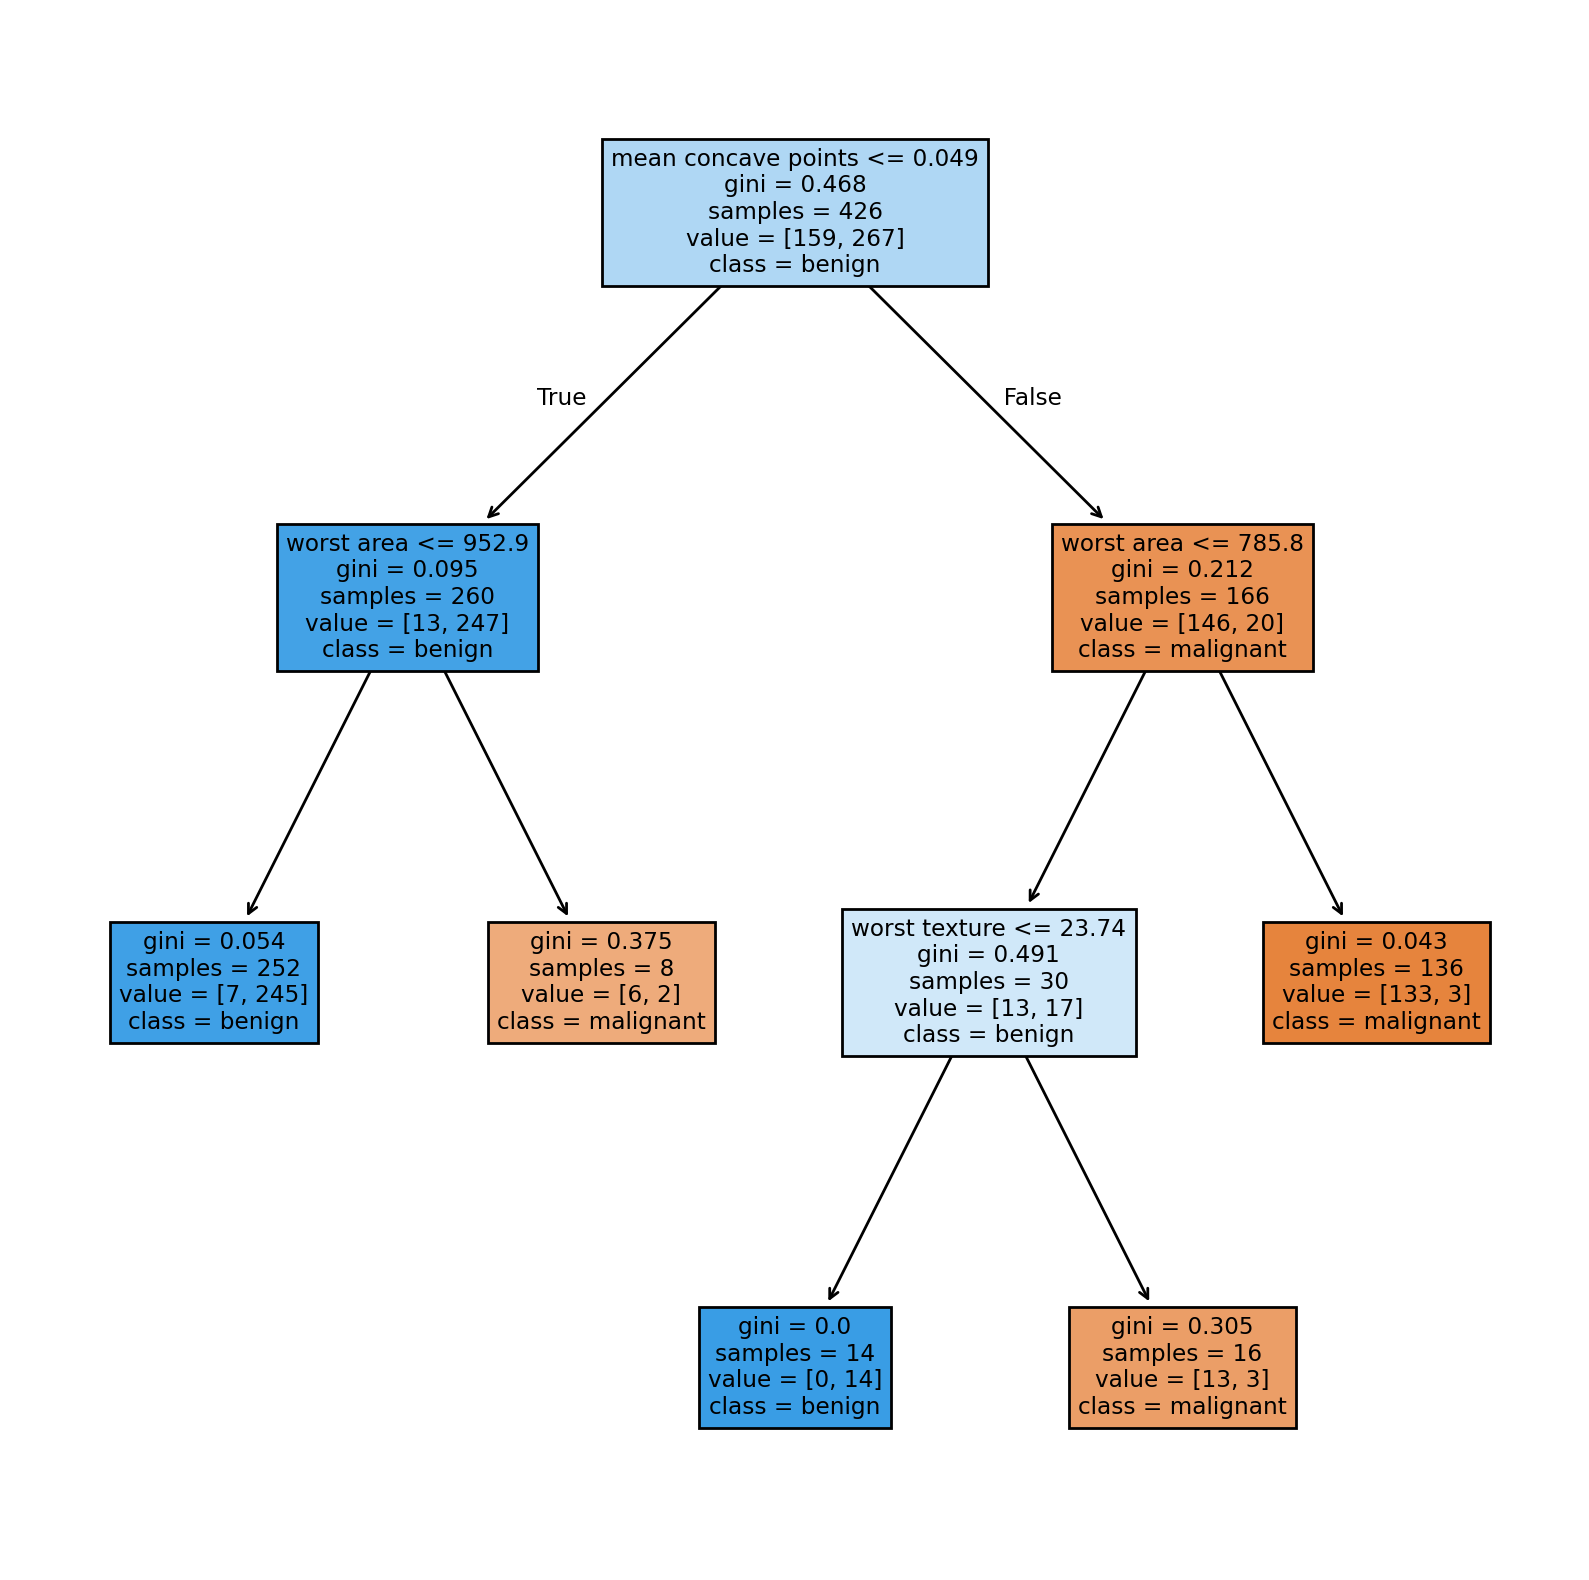

In [15]:
# Decision tree visualization
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=200)
axes.plot(linewidth =0)
_ = plot_tree(final_clf,
               feature_names = df.columns[:-1],
               class_names=data.target_names,
               filled = True,)

### Visualizing the Final Pruned Decision Tree

- **Purpose:**
  - Display the structure of the final, optimally pruned decision tree for interpretability and analysis.

- **Step-by-Step:**
  - Create a matplotlib figure for visualization.
  - Use `plot_tree` to render the pruned tree, including feature and class names, and color nodes by class.

- **Expected Output:**
  - A visual plot of the final pruned decision tree, illustrating the simplified decision rules and improved generalization.

In [16]:
final_clf.tree_.node_count, final_clf.get_depth()

(9, 3)

### Final Tree Complexity Metrics

- **Purpose:**
  - Quantify the complexity of the final pruned decision tree.

- **Step-by-Step:**
  - Retrieve the total number of nodes and the maximum depth of the final tree.

- **Expected Output:**
  - Tuple containing the node count and depth, providing a concise summary of the model's size and complexity.

In [17]:
final_clf.score(X_test, y_test)

0.9370629370629371

## Summary and Conclusions

**Objective:**
- To explore the construction, evaluation, and regularization of decision tree classifiers using the Breast Cancer dataset.

**Workflow Overview:**
- Imported essential libraries and loaded the dataset.
- Prepared the data and visualized its structure.
- Built and visualized an initial decision tree model.
- Evaluated model performance and identified overfitting.
- Applied cost-complexity pruning to regularize the tree.
- Analyzed the effect of pruning on impurity, node count, depth, and accuracy.
- Selected and trained a final pruned model with optimal alpha.
- Assessed the final model's complexity and accuracy.

**Key Results:**
- The initial unpruned tree achieved perfect training accuracy but lower test accuracy, indicating overfitting.
- Cost-complexity pruning reduced model complexity and improved generalization.
- The optimal pruned tree (ccp_alpha ≈ 0.015) balanced accuracy and simplicity, achieving strong test performance.

**Recommendations / Next Steps:**
- Consider further hyperparameter tuning or cross-validation for robust model selection.
- Explore feature engineering or alternative algorithms for potential performance gains.
- Apply similar regularization techniques to other datasets or models to enhance generalization.

### Final Model Accuracy Evaluation

- **Purpose:**
  - Assess the predictive accuracy of the final pruned decision tree on the test set.

- **Step-by-Step:**
  - Use the `score` method to compute the accuracy of the final model on unseen test data.

- **Expected Output:**
  - A single accuracy value, indicating the generalization performance of the optimally pruned decision tree.